In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression

In [2]:
log_regr_df = pd.read_csv('logistic_regression/f1_score.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
columns = ['Features', 'Head pose', r'f1_score', 'emotion', r'F$_1$ score']
log_regr_df.columns = ['features', 'Head pose', 'f1_score', 'emotion', 'value']
log_regr_df.head()

,features,Head pose,f1_score,emotion,value
0,delaunay,tilted,label_1,anger,0.40
1,delaunay,tilted,label_1,disgust,0.28
2,delaunay,tilted,label_1,fear,0.17
3,delaunay,tilted,label_1,happiness,0.56
4,delaunay,tilted,label_1,sadness,0.23


### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

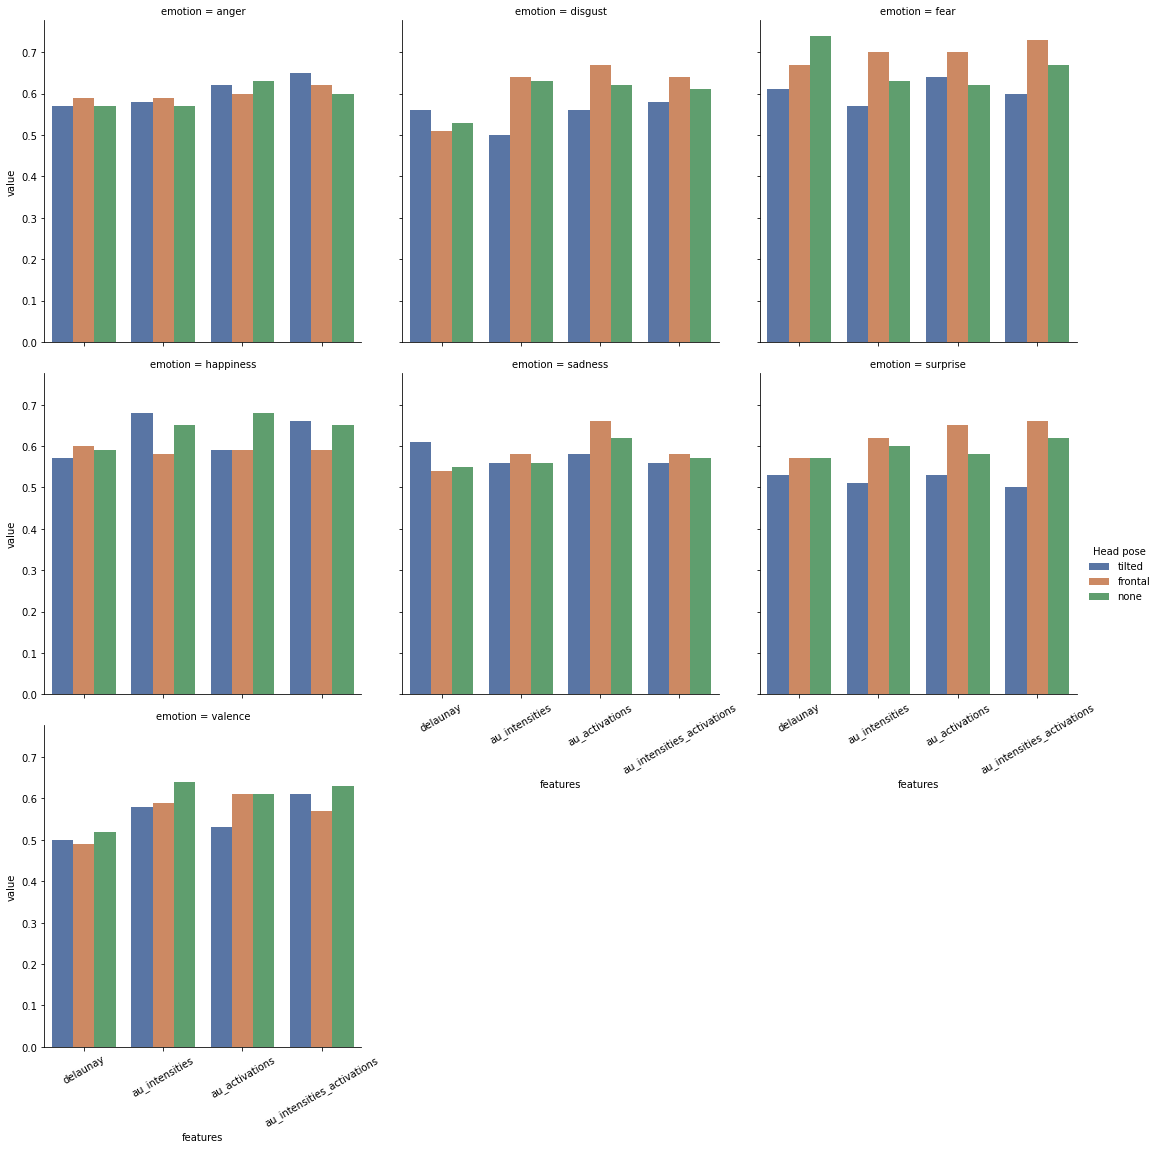

In [4]:
fg = sns.catplot(x='features', y='value', hue='Head pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# Linear SVM

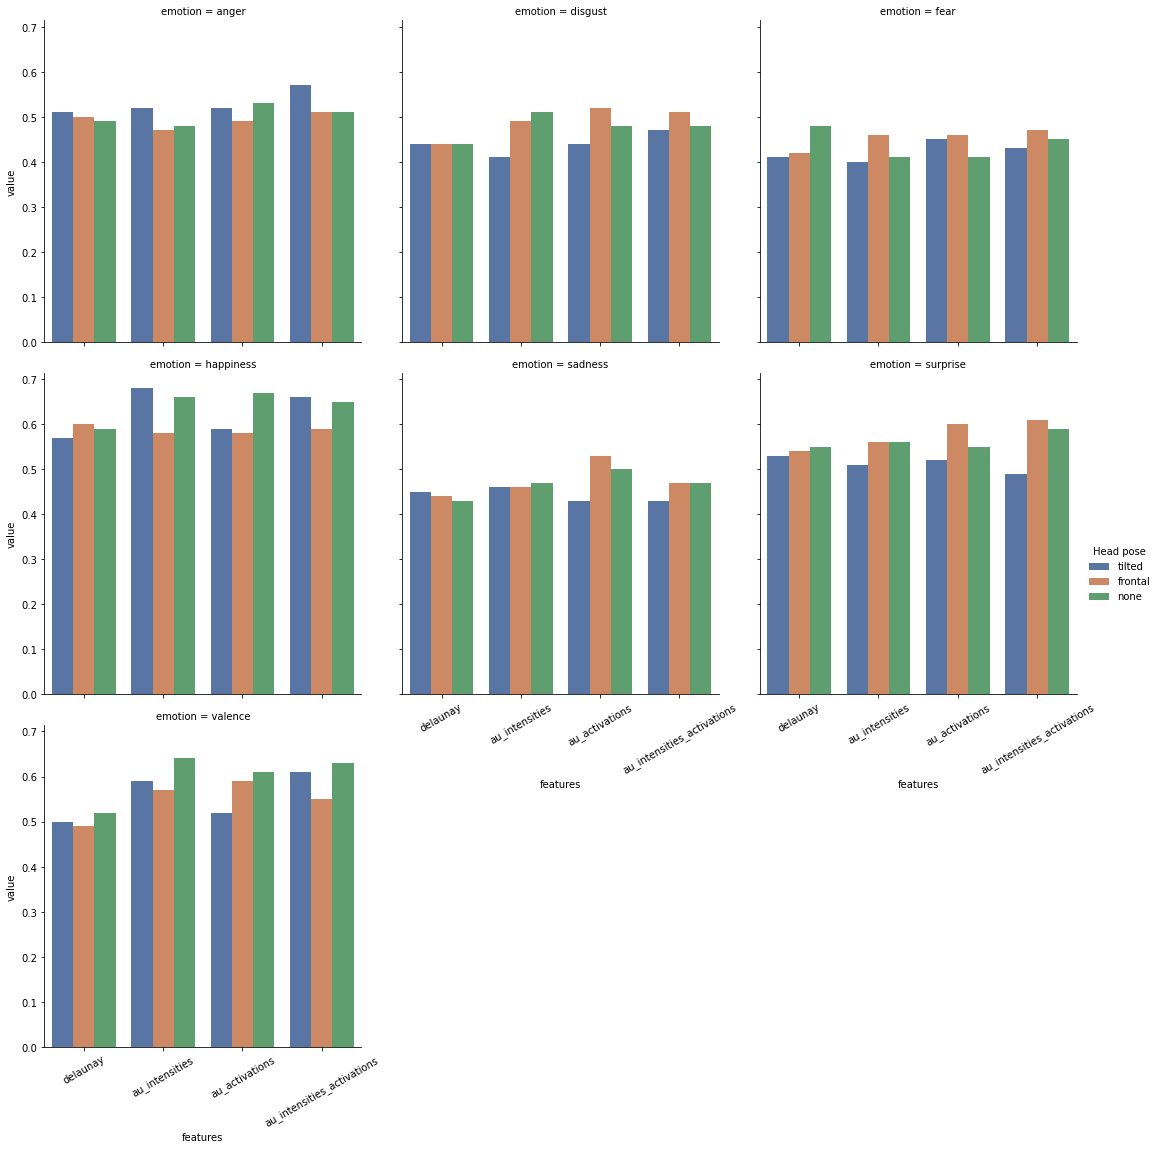

In [5]:
fg = sns.catplot(x='features', y='value', hue='Head pose', col='emotion', data=(log_regr_df[log_regr_df.f1_score=='macro_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

In [6]:
linear_svm_df = pd.read_csv('linear_SVM/f1_score.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
linear_svm_df.columns = ['features', 'pose', 'f1_score', 'emotion', 'value']
linear_svm_df.head()

,features,pose,f1_score,emotion,value
0,delaunay,tilted,label_1,anger,0.34
1,delaunay,tilted,label_1,disgust,0.28
2,delaunay,tilted,label_1,fear,0.12
3,delaunay,tilted,label_1,happiness,0.59
4,delaunay,tilted,label_1,sadness,0.20


### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

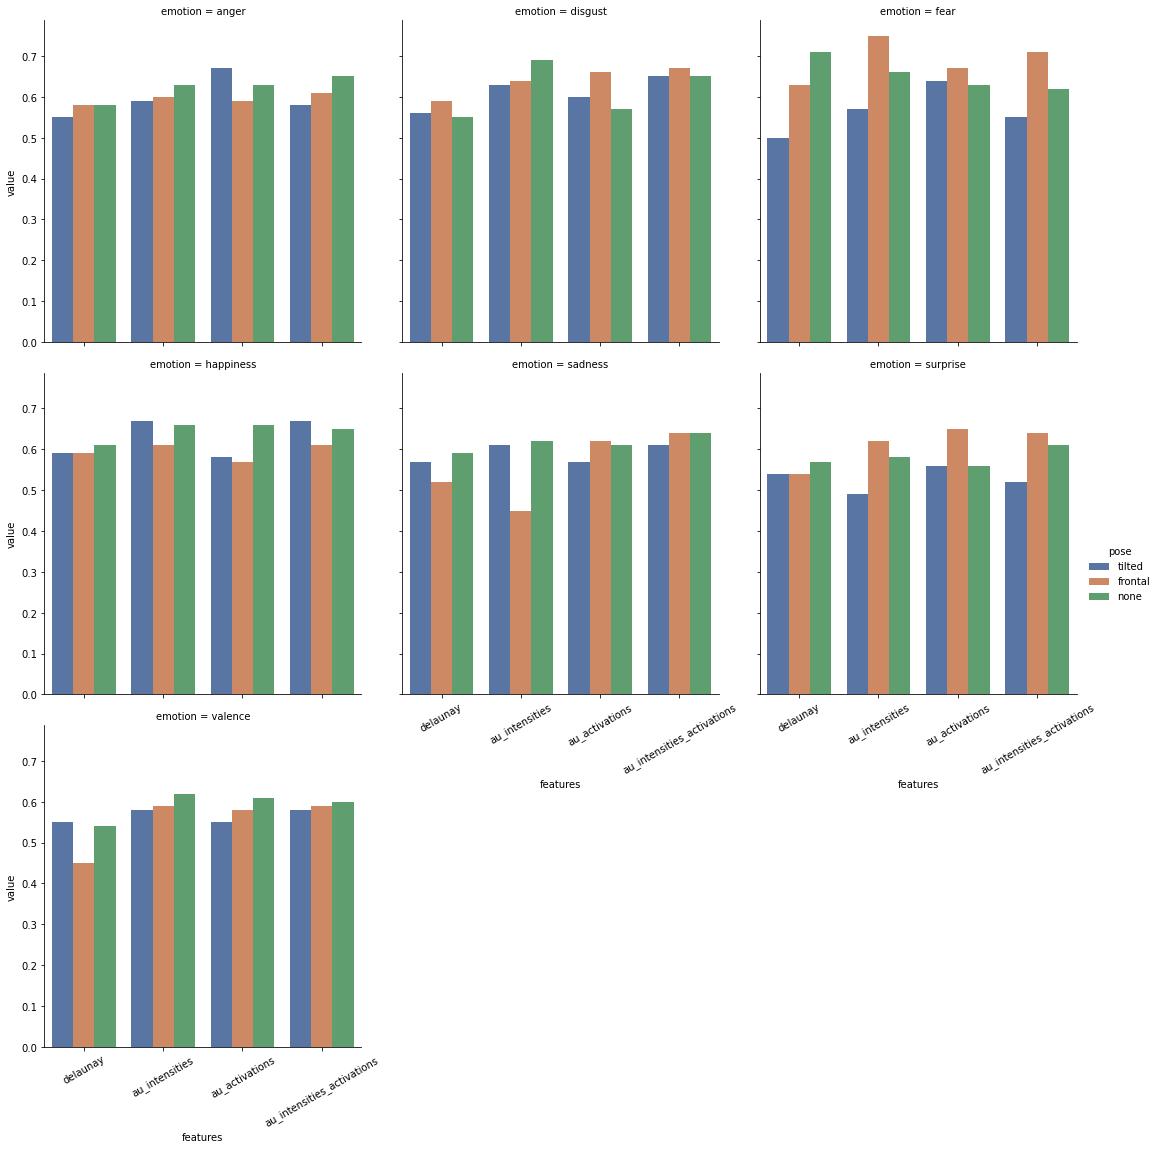

In [8]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(linear_svm_df[linear_svm_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# Kernel SVM

In [9]:
kernel_svm_df = pd.read_csv('kernel_SVM/f1_score.csv', header=[0,1], index_col=[0,1]).unstack(level=[0,1]).reset_index()
kernel_svm_df.columns = ['features', 'pose', 'f1_score', 'emotion', 'value']
kernel_svm_df.head()

,features,pose,f1_score,emotion,value
0,delaunay,tilted,label_1,anger,0.35
1,delaunay,tilted,label_1,disgust,0.30
2,delaunay,tilted,label_1,fear,0.13
3,delaunay,tilted,label_1,happiness,0.58
4,delaunay,tilted,label_1,sadness,0.24


## Confronto dell'_f1-score_ rispetto alla _pose_ per ogni feature sulle diverse emozioni

### Weighted_avg

Qui vengono evidenziate le differenze prestazionali tra i diversi valori della _pose_

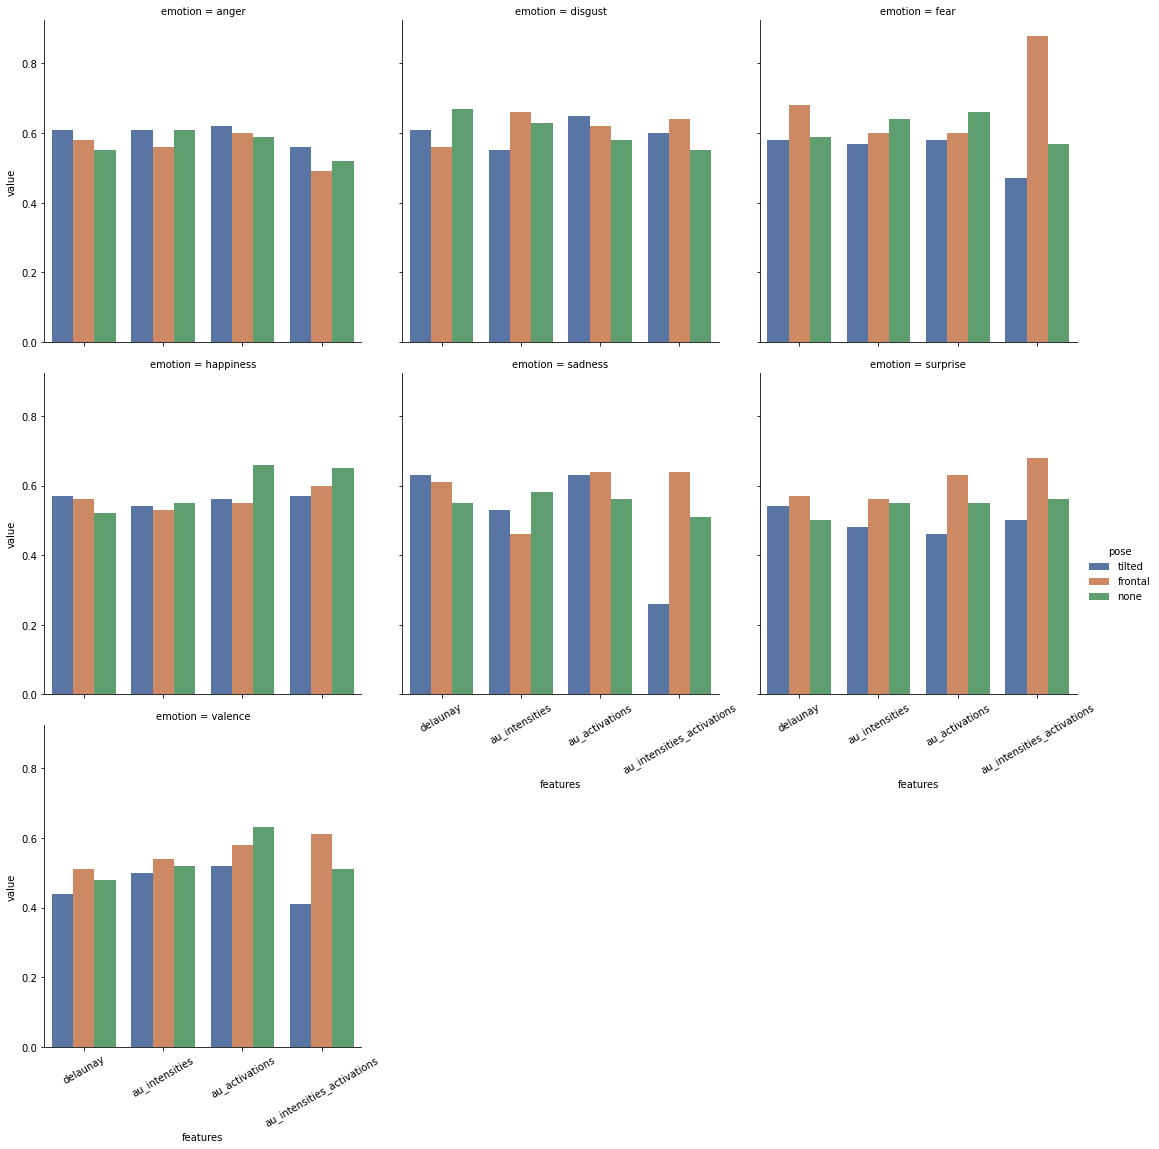

In [10]:
fg = sns.catplot(x='features', y='value', hue='pose', col='emotion', data=(kernel_svm_df[kernel_svm_df.f1_score=='weighted_avg']), kind='bar', palette='deep', col_wrap=3)
fg.set_xticklabels(rotation=30)
plt.show()

# Medioni

## Logistic regression

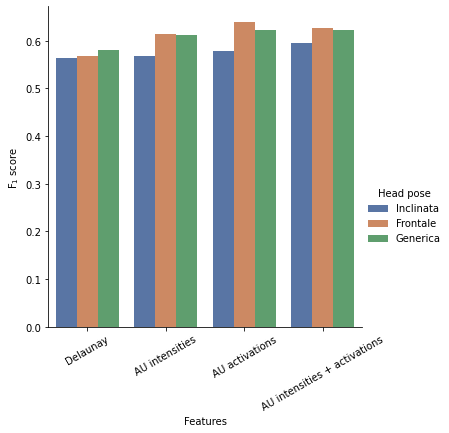

In [11]:
log_regr_df = pd.read_csv('logistic_regression/f1_score.csv', header=[0,1], index_col=[0,1])\
                                .loc[(['weighted_avg']),:].rename(columns={'tilted':'Inclinata','frontal':'Frontale','none':'Generica'},level=1)\
                                .mean().reset_index().rename(columns={0:r'F$_1$ score','features':'Features','pose':'Head pose'})

fg = sns.catplot(x='Features', y=r'F$_1$ score', hue='Head pose', data=log_regr_df, kind='bar', palette='deep')
fg.set_xticklabels(labels= ['Delaunay', 'AU intensities', 'AU activations', 'AU intensities + activations'],rotation=30)
fg.savefig('/home/filippo/Downloads/logistic_pose.png', dpi=600)
plt.show()

#fg = sns.catplot(x='features', y='weighted_avg', hue='pose', data=log_regr_df, kind='point', palette='deep')
#fg.set_xticklabels(rotation=30)
#plt.show()

## Linear SVM

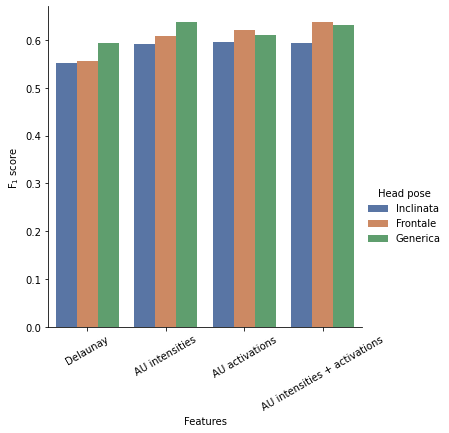

In [12]:
linear_df = pd.read_csv('linear_SVM/f1_score.csv', header=[0,1], index_col=[0,1])\
                                .loc[(['weighted_avg']),:].rename(columns={'tilted':'Inclinata','frontal':'Frontale','none':'Generica'},level=1)\
                                .mean().reset_index().rename(columns={0:r'F$_1$ score','features':'Features','pose':'Head pose'})

fg = sns.catplot(x='Features', y=r'F$_1$ score', hue='Head pose', data=linear_df, kind='bar', palette='deep')
fg.set_xticklabels(labels= ['Delaunay', 'AU intensities', 'AU activations', 'AU intensities + activations'],rotation=30)
fg.savefig('/home/filippo/Downloads/linear_pose.png', dpi=600)
plt.show()

#fg = sns.catplot(x='features', y='weighted_avg', hue='pose', data=linear_svm_df, kind='point', palette='deep')
#fg.set_xticklabels(rotation=30)
#plt.show()

## Kernel SVM

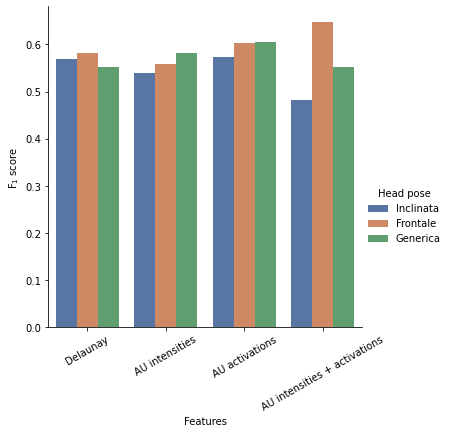

In [13]:
kernel_df = pd.read_csv('kernel_SVM/f1_score.csv', header=[0,1], index_col=[0,1])\
                                .loc[(['weighted_avg']),:].rename(columns={'tilted':'Inclinata','frontal':'Frontale','none':'Generica'},level=1)\
                                .mean().reset_index().rename(columns={0:r'F$_1$ score','features':'Features','pose':'Head pose'})

fg = sns.catplot(x='Features', y=r'F$_1$ score', hue='Head pose', data=kernel_df, kind='bar', palette='deep')
fg.set_xticklabels(labels= ['Delaunay', 'AU intensities', 'AU activations', 'AU intensities + activations'],rotation=30)
fg.savefig('/home/filippo/Downloads/kernel_pose.png', dpi=600)
plt.show()

#fg = sns.catplot(x='features', y='weighted_avg', hue='pose', data=kernel_svm_df, kind='point', palette='deep')
#fg.set_xticklabels(rotation=30)
#plt.show()